In [29]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
filename="train.csv"
df = pd.read_csv(filename)

In [4]:
import numpy 

def getEncodings(dataframe):
    encodings = {}
    for column in dataframe.columns:
        column_values = df[column]
        #print(type(column_values[0]))
        #print(column)
        if isinstance(column_values[0],str) or column=="Alley" or column=="FireplaceQu" or column=="PoolQC" or column=="Fence" or column=="MiscFeature":  
            encoder = {}
            counter = 1
            for value in column_values.unique():
                encoder[value]=counter
                counter = counter + 1
            encodings[column]= encoder
    return encodings

encodings = getEncodings(df)
print(encodings)

    

{'MSZoning': {'RL': 1, 'RM': 2, 'C (all)': 3, 'FV': 4, 'RH': 5}, 'Street': {'Pave': 1, 'Grvl': 2}, 'Alley': {nan: 1, 'Grvl': 2, 'Pave': 3}, 'LotShape': {'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4}, 'LandContour': {'Lvl': 1, 'Bnk': 2, 'Low': 3, 'HLS': 4}, 'Utilities': {'AllPub': 1, 'NoSeWa': 2}, 'LotConfig': {'Inside': 1, 'FR2': 2, 'Corner': 3, 'CulDSac': 4, 'FR3': 5}, 'LandSlope': {'Gtl': 1, 'Mod': 2, 'Sev': 3}, 'Neighborhood': {'CollgCr': 1, 'Veenker': 2, 'Crawfor': 3, 'NoRidge': 4, 'Mitchel': 5, 'Somerst': 6, 'NWAmes': 7, 'OldTown': 8, 'BrkSide': 9, 'Sawyer': 10, 'NridgHt': 11, 'NAmes': 12, 'SawyerW': 13, 'IDOTRR': 14, 'MeadowV': 15, 'Edwards': 16, 'Timber': 17, 'Gilbert': 18, 'StoneBr': 19, 'ClearCr': 20, 'NPkVill': 21, 'Blmngtn': 22, 'BrDale': 23, 'SWISU': 24, 'Blueste': 25}, 'Condition1': {'Norm': 1, 'Feedr': 2, 'PosN': 3, 'Artery': 4, 'RRAe': 5, 'RRNn': 6, 'RRAn': 7, 'PosA': 8, 'RRNe': 9}, 'Condition2': {'Norm': 1, 'Artery': 2, 'RRNn': 3, 'Feedr': 4, 'PosN': 5, 'PosA': 6, 'RRAn': 7, 

In [5]:
def applyEncodings(dataframe,encodings):
    return dataframe.replace(encodings)
clean_column=applyEncodings(df,encodings).fillna(0)
clean_column=pd.DataFrame(clean_column)
clean_column.to_csv("cleanit.csv")

clean_column.drop(['MiscFeature','MiscVal','Fireplaces','BsmtFinType2','PoolArea','TotRmsAbvGrd','GarageYrBlt','Id'], inplace=True, axis=1)
features=clean_column #copy of the data
main_target_price = clean_column.filter(['SalePrice'])
print(clean_column.columns)
features.drop('SalePrice', inplace=True, axis=1)






Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'Scre

In [6]:
main_target_price=main_target_price.unstack()

In [7]:
from sklearn.svm import SVC

train_data, test_data, train_target, test_target = train_test_split( features, main_target_price, test_size=0.3, random_state=0)
svm = SVC(C=100, gamma='auto')
svm.fit(train_data, train_target)
print("SVM accuracy score: {:.2f}".format(svm.score(test_data, test_target)))

SVM accuracy score: 0.01


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
X_train_scaled = scaler.transform(train_data)
X_test_scaled = scaler.transform(test_data)

svm.fit(X_train_scaled, train_target)
#print(X_train_scaled)
print("SVM accuracy score: {:.2f}".format(svm.score(X_test_scaled, test_target)))

SVM accuracy score: 0.01


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=150)
#print(iris)
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print("10-fold cross validation accuracy scores: {}".format(scores))
print("10-fold cross validation average accuracy scores: {:.2f}".format(scores.mean(axis=0)))

10-fold cross validation accuracy scores: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]
10-fold cross validation average accuracy scores: 0.97


In [35]:
logreg = LinearRegression()

scores = cross_val_score(logreg, train_data,train_target, cv=10)
print("10-fold cross validation accuracy scores: {}".format(scores))
print("10-fold cross validation average accuracy scores: {:.2f}".format(scores.mean(axis=0)))

10-fold cross validation accuracy scores: [0.86541225 0.6011684  0.83201005 0.90878463 0.89406031 0.80093475
 0.86982517 0.83547309 0.9097381  0.83132779]
10-fold cross validation average accuracy scores: 0.83


In [32]:

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train_scaled, train_target)
        score=svm.score(X_test_scaled, test_target)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best accuracy score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best accuracy score: 0.02
Best parameters: {'C': 10, 'gamma': 0.01}


In [33]:
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train_scaled, train_target)
print("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"% np.mean((grid.predict(X_test_scaled) - test_target) ** 2))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce t

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce t

r2 / variance :  -5633.304622855211
Residual sum of squares: 34701159815.39


In [20]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=30, random_state=42))
select.fit(train_data, train_target)
X_train_rf = select.transform(train_data)
print("X_train.shape: {}".format(train_data.shape))
print("X_train_rf.shape: {}".format(X_train_rf.shape))
#train_data.columns[1]

X_train.shape: (1022, 72)
X_train_rf.shape: (1022, 24)


'MSZoning'

In [35]:
mask = select.get_support()
#print(mask)

for i in range(0,len(mask)):
    if mask[i]:
        print(train_data.columns[i])
# selected_feat= train_data.columns[(select.get_support())]
# len(selected_feat) 



LotFrontage
LotArea
Neighborhood
OverallQual
OverallCond
YearBuilt
YearRemodAdd
Exterior1st
Exterior2nd
MasVnrArea
BsmtFinType1
BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
BedroomAbvGr
FireplaceQu
GarageArea
WoodDeckSF
OpenPorchSF
MoSold
YrSold


24

[False False  True  True False False False False False False False  True
 False False False False  True  True  True  True False False  True  True
 False  True False False False False False False  True  True False  True
  True False False False False  True  True False  True False False False
 False  True False False False  True False False False  True False False
 False  True  True False False False False False  True  True False False]


([<matplotlib.axis.YTick at 0x290bdbaf0>], [Text(0, 0, '')])

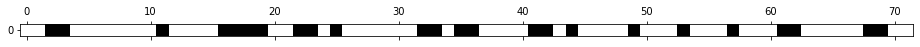

In [36]:
mask = select.get_support()
print(mask)

# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("")
plt.yticks([0])

In [45]:
lr = LogisticRegression(max_iter=3500)
lr.fit(train_data, train_target)
print("Score with all features: {:.3f}".format(lr.score(test_data, test_target)))

# transform test data
X_test_rf = select.transform(test_data)
score = LogisticRegression(max_iter=3000).fit(X_train_rf, train_target).score(X_test_rf, test_target)
print("Score with only selected features: {:.3f}".format(score))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score with all features: 0.007
Score with only selected features: 0.005


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
lr = LinearRegression()
lr.fit(train_data, train_target)
print("Score with all features: {:.3f}".format(lr.score(test_data, test_target)))

# transform test data
X_test_rf = select.transform(test_data)
score = lr.fit(X_train_rf, train_target).score(X_test_rf, test_target)
print("Score with only selected features: {:.3f}".format(score))
print(lr.coef_)
print(sorted(lr.coef_))

#pd.Series(select.estimator_,lr.coef_).hist()

Score with all features: 0.712
Score with only selected features: 0.709
[ 9.57469842e+01  5.71321721e-01 -1.61003932e+02  1.55715921e+04
  5.49929775e+03  3.42449109e+02  1.77568441e+02 -1.48109513e+03
  1.17147785e+03  3.08543404e+01 -1.80814763e+02  1.58301157e+01
 -1.83385253e+00  2.11269200e+01  1.34645968e+01  1.00915082e+01
  4.73991110e+01 -6.37703432e+03  4.38221622e+03  3.20068967e+01
  2.22545791e+01  1.39231206e+01 -5.03766278e+02 -3.69503869e+02]
[-6377.034323245141, -1481.0951278968143, -503.76627755791867, -369.50386906822666, -180.81476308906468, -161.00393246986644, -1.8338525301970823, 0.5713217210580872, 10.091508177380588, 13.464596788237396, 13.923120630796502, 15.830115741164521, 21.12691999728937, 22.254579089945047, 30.854340442755515, 32.00689665633683, 47.39911103475549, 95.74698415036187, 177.5684411575715, 342.4491089849548, 1171.477846525016, 4382.216218187408, 5499.297753386528, 15571.592105182548]


In [42]:
print(X_train_rf)
plt.scatter(X_train_rf[OverallQual], train_target, color = "red")
plt.plot(X_train_rf[OverallQual], lr.predict(X_train_rf[OverallQual]), color = "green")
plt.title("overall condition")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

[[0.000e+00 9.375e+03 1.000e+00 ... 3.600e+01 2.000e+00 2.009e+03]
 [0.000e+00 2.887e+03 2.000e+01 ... 0.000e+00 1.100e+01 2.008e+03]
 [5.000e+01 7.207e+03 9.000e+00 ... 0.000e+00 2.000e+00 2.010e+03]
 ...
 [6.800e+01 8.930e+03 1.000e+01 ... 0.000e+00 4.000e+00 2.010e+03]
 [0.000e+00 3.196e+03 2.200e+01 ... 2.000e+01 1.000e+01 2.006e+03]
 [5.800e+01 1.677e+04 4.000e+00 ... 8.100e+01 6.000e+00 2.010e+03]]


NameError: name 'OverallQual' is not defined

In [ ]:
plt.scatter(X_test_rf, y_test, color = "red")
plt.plot(x_train, lr.predict(x_train), color = "green")
plt.title("Salary vs Experience (Testing set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()
